In [1]:
!pip install cufflinks

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 81.7/81.7 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68718 sha256=ec60b215351b3e8f9ea4a822b6bc8d3ff0b9df863daa69ffdf3e001cbb4eaca0
  Stored in directory: c:\users\srich\appdata\local\pip\cache\wheels\29\b4\f8\2fd2206eeeba6ccad8167e4e8894b8c4ec27bf1342037fd136
Successfully built cufflinks


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import cufflinks as cf
cf.go_offline()

In [4]:
data = pd.read_csv("spam.csv", encoding="latin-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data = data[["v1","v2"]]
data = data.rename(columns = {"v1": "target", "v2": "text"})
data.head()


,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
data.describe()

,target,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


<AxesSubplot:xlabel='target', ylabel='count'>

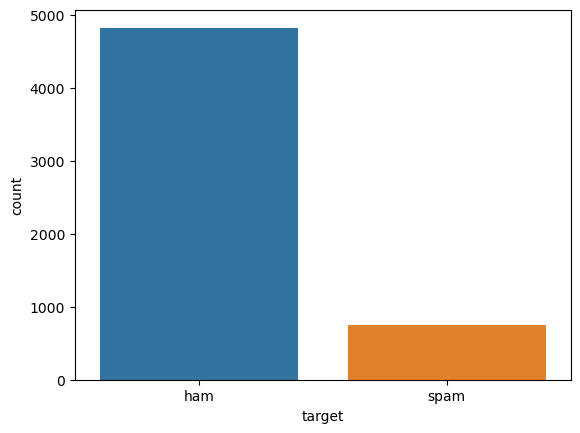

In [8]:
sns.countplot(x = data["target"])

In [9]:
data.isna().sum()

target    0
text      0
dtype: int64

In [10]:
data.drop_duplicates(inplace=True)
data.shape

(5169, 2)

In [11]:
data["length"] = data["text"].apply(lambda x: len(x))
data.head()

,target,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [12]:
g = data.pivot(columns="target", values="length").iplot(kind="box", asFigure=True, boxpoints='outliers')
g.update_layout(width=800,height=600,)
data[data["length"] ==910].text[1084]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [13]:
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re

In [14]:
"""try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')"""

"try:\n    nltk.data.find('corpora/wordnet')\nexcept LookupError:\n    nltk.download('wordnet')"

In [15]:
data.loc[3008].text

'Update_Now - 12Mths Half Price Orange line rental: 400mins...Call MobileUpd8 on 08000839402 or call2optout=J5Q'

In [16]:
text='Update_Now - 12Mths Half Price Orange line rental: 400mins...Call MobileUpd8 on 08000839402 or call2optout=J5Q'
text = text.lower()
text = [c if c not in string.punctuation else " " for c in text]
text = "".join(text)
text = re.sub(r'\d+', '', text)

words = nltk.word_tokenize(text)
stopword = stopwords.words("english")
words = [word for word in words if word not in stopword]
lemmatizer = WordNetLemmatizer()
words = [lemmatizer.lemmatize(word, pos="v") for word in words]
" ".join(words)

'update mths half price orange line rental mins call mobileupd calloptout jq'

In [17]:
def pre_process(text):
    
    text = text.lower()
    text = [c if c not in string.punctuation else " " for c in text]
    text = "".join(text)
    text = re.sub(r'\d+', '', text)

    words = nltk.word_tokenize(text)
    stopword = stopwords.words("english")
    words = [word for word in words if word not in stopword]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word, pos="v") for word in words]
    
    text = " ".join(words)
    
    return text
data["text"] = data["text"].apply(lambda x: pre_process(x))
data.head()

,target,text,length
0,ham,go jurong point crazy available bugis n great ...,111
1,ham,ok lar joke wif u oni,29
2,spam,free entry wkly comp win fa cup final tkts st ...,155
3,ham,u dun say early hor u c already say,49
4,ham,nah think go usf live around though,61


In [18]:
from sklearn.model_selection import train_test_split
X = data["text"]
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
bow = CountVectorizer()
X_train_vec = bow.fit_transform(X_train)
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train_vec, y_train)


MultinomialNB()

In [19]:
X_test_vec = bow.transform(X_test)
predictions = mnb.predict(X_test_vec)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.98      0.99      0.99      1343
        spam       0.94      0.90      0.92       208

    accuracy                           0.98      1551
   macro avg       0.96      0.95      0.95      1551
weighted avg       0.98      0.98      0.98      1551

[[1332   11]
 [  21  187]]


In [20]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([("bow", CountVectorizer()),("tfidf", TfidfTransformer()),("model", MultinomialNB())])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', MultinomialNB())])

In [21]:
predictions = pipeline.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1343
        spam       0.99      0.65      0.79       208

    accuracy                           0.95      1551
   macro avg       0.97      0.83      0.88      1551
weighted avg       0.95      0.95      0.95      1551

[[1342    1]
 [  72  136]]


In [22]:
def train_pipeline(vectorizer, model ):
    pipeline = Pipeline([
    ("bow", vectorizer),
    ("tfidf", TfidfTransformer()),
    ("model", model)
    ])
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    print(classification_report(y_test, predictions))
    print(confusion_matrix(y_test, predictions))
train_pipeline(TfidfVectorizer(), MultinomialNB())

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1343
        spam       0.99      0.68      0.81       208

    accuracy                           0.96      1551
   macro avg       0.97      0.84      0.89      1551
weighted avg       0.96      0.96      0.95      1551

[[1342    1]
 [  66  142]]


In [23]:
from sklearn.ensemble import RandomForestClassifier
train_pipeline(TfidfVectorizer(), RandomForestClassifier())

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1343
        spam       0.98      0.75      0.85       208

    accuracy                           0.96      1551
   macro avg       0.97      0.87      0.92      1551
weighted avg       0.97      0.96      0.96      1551

[[1340    3]
 [  52  156]]


In [24]:
from sklearn.linear_model import LogisticRegression
train_pipeline(TfidfVectorizer(), LogisticRegression())

              precision    recall  f1-score   support

         ham       0.94      1.00      0.97      1343
        spam       0.96      0.58      0.72       208

    accuracy                           0.94      1551
   macro avg       0.95      0.79      0.85      1551
weighted avg       0.94      0.94      0.93      1551

[[1338    5]
 [  87  121]]


In [25]:
test_df = pd.DataFrame(X_test)
test_df["Actual"] = y_test
test_df["Predicted"] = predictions
test_df[test_df.Actual != test_df.Predicted]

,text,Actual,Predicted
1673,monthly password wap mobsi com use wap phone pc,spam,ham
2679,new tone week include mcfly ab sara jorge shoc...,spam,ham
134,want get lay tonight want real dog locations s...,spam,ham
5466,http tms widelive com index wml id ada first t...,spam,ham
2913,sorry u unsubscribe yet mob offer package min ...,spam,ham
...,...,...,...
2692,urgent urgent free flight europe give away cal...,spam,ham
2877,hey boys want hot xxx pics send direct ur phon...,spam,ham
5370,date two start send text talk sport radio last...,spam,ham
3300,rct thnq adrian u text rgds vatian,spam,ham


In [26]:
test_df.loc[1673].text

'monthly password wap mobsi com use wap phone pc'